In [13]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB

from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import label_binarize, LabelEncoder

In [16]:
financials = pd.read_csv('/Users/sa12/Documents/Repositories/FinancialFraudDetection/FraudData/cleanfinancials.csv')

# Logistic Regression

In [17]:
#split dataset in features and target variable
feature_cols = ['Amount','OldOrig','NewOrig','OldDest', 'NewDest', 'Fraud']
X = financials[feature_cols] # Features
y = financials.Fraud # Target variable

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [19]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [20]:
feature_to_plot_index = 0
num_features = X_train.shape[1]

feature_min = X[:,feature_to_plot_index].min()
feature_max = X[:, feature_to_plot_index].max()
x_range = np.linspace(feature_min, feature_max, 100).reshape(-1,1)

other_features_indices = [i for i in range(num_features) if i != feature_to_plot_index]
other_features_mean = np.mean(X_train[:, other_features_indices], axis=0)
plot_X = np.zeros((11, num_features))
plot_X[:, feature_to_plot_index] = x_range.flatten()
for i, idx in enumerate(other_features_indices):
    plot_X[:,idx] = other_features_mean(1)

InvalidIndexError: (slice(None, None, None), 0)

In [21]:
print('Classification Report\n', classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    508269
           1       1.00      1.00      1.00       718

    accuracy                           1.00    508987
   macro avg       1.00      1.00      1.00    508987
weighted avg       1.00      1.00      1.00    508987



The model correctly identified all positive and negative cases. This tells me the model is overfitted to the data 

In [22]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 0.0014086635822289412
   Columns  Coefficient Estimate
0   Amount                  -0.0
1  OldOrig                   0.0
2  NewOrig                  -0.0
3  OldDest                  -0.0
4  NewDest                  -0.0
5    Fraud                   0.0


In [37]:

# Build feature/target arrays
X, y = financials.drop("Fraud", axis=1), financials["Fraud"].values.flatten()

# encode species label numerically 
le = LabelEncoder()
y = le.fit_transform(y)

# Create train/test sets, where test set is 25% of data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1121218, test_size=25, stratify=y
)

In [15]:
# define model via 'ovr' multi_class classification
LR_model = LogisticRegression(multi_class="ovr", class_weight="balanced")

# fit the model
LR_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', multi_class='ovr')

In [14]:
cnf_matrix = confusion_matrix(LR_model)
cnf_matrix

NameError: name 'model' is not defined

In [ ]:
# Subsetting our data into our dependent and independent variables.
# Create a variable called 'X' and assign it the density field of wine.
# Create a variable called 'y' (that's right, lower case) and assign it the fixed.acidity field of wine. 
# Using double brackets allows us to use the column headings. 
X = financials[['OldDest']]
y = financials[['NewDest']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
# The random_state parameter allows our work to be checked and replicated by other data scientists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

# KNN

In [26]:
# create the kNN object with 5 neighours (default)
KNN_model = KNeighborsClassifier(n_neighbors=5)

# fit a model with the already created "X_data" and "y_labels"
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 6 features as input.

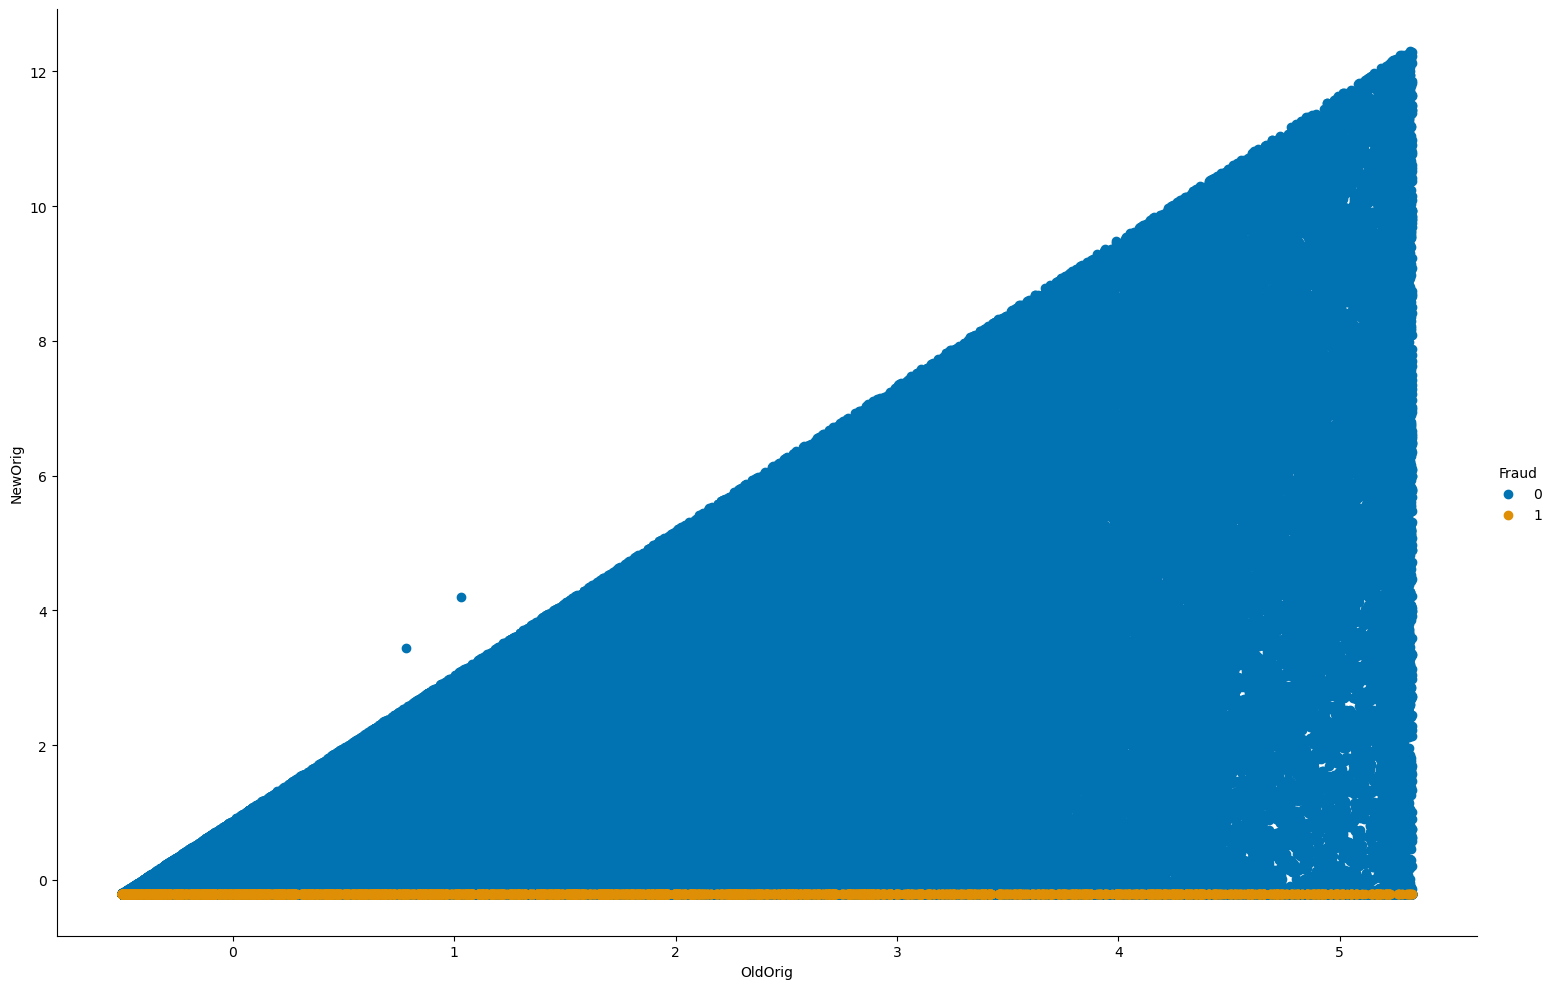

In [27]:
# Set parameters for decision boundary plot
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(financials, hue="Fraud", height=10, aspect=1.5, palette = 'colorblind') .map(plt.scatter, "OldOrig", "NewOrig",).add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [KNN_model.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('OldOrig')
my_ax.set_ylabel('NewOrig')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()
# view the created decision boundary

In [29]:
# create predictions on our `X_data`
knn_y_test = KNN_model.predict(X_test)

# we then view the various measures of accuracy of our default kNN model
print("Not Fraud = 0, Fraud = 1")

# compare the real data "y_labels" to our predicted data "y_hat"
print(classification_report(y_train, knn_y_test))

Not Fraud = 0, Fraud = 1


ValueError: Found input variables with inconsistent numbers of samples: [2035947, 508987]

In [33]:
# create a search space for our var_smoothing param 
param_dist_k = {'n_neighbors': np.arange(1, 31),
                'weights':['distance'],
                'metric':['euclidean']}

# create randomized search object
search_knn = RandomizedSearchCV(model_1, param_distributions=param_dist_k, n_iter=20, cv=5, verbose=1, random_state=42)

# search for the optimal hyperparam
search_knn.fit(X_data, y_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
                   random_state=42, verbose=1)

In [ ]:
# view the best hyperparam and corresponding cv accuracy score

print("Best 'k' found: ", search_knn.best_params_)
print("Best cross-validated score: ", search_knn.best_score_)

In [ ]:
# create a KNeighborsClassifier classifier with this selected k
KNN_model_tuned = KNeighborsClassifier(n_neighbors=search_knn.best_params_["n_neighbors"])

# fit the model with your corresponding 'X_data' and 'y_labels' datasets
KNN_model_tuned.fit(X_data, y_labels)

In [ ]:
LR_results = (f"Logistic Regression: Initial F1: {lr_f1_old_score}, Optimized f1:{lr_f1_new_score}")
KNN_results = (f"KNN: Initial F1: {knn_f1_old_score}, Optimized f1:{knn_f1_new_score}")
SVM_results = (f"SVM: Initial F1: {svm_f1_old_score}, Optimized f1:{svm_f1_new_score}")